In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
de1 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200104.txt',sep=',')
de2 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200111.txt',sep=',')
de3 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200118.txt',sep=',')
de4 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200125.txt',sep=',')
df=pd.concat([de1,de2,de3,de4])

filtered = df.groupby(['UNIT','STATION', 'SCP']).agg({'ENTRIES': ['max', 'min']})
filtered.columns = ['ENTRIES_max', 'ENTRIES_min']
filtered['diff'] = filtered['ENTRIES_max'].sub(filtered['ENTRIES_min'], axis = 0) 
print("\nDifference of ENTRIES_min and ENTRIES_max :\n", filtered)
summed = filtered.groupby(['UNIT','STATION']).agg(sum).nlargest(5,'diff')
print(summed)
summed.to_csv(r'C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/1) Top 5 Stations.csv', index = True)

ndf = pd.read_csv('C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/1) Top 5 Stations.csv')
ax = ndf.plot.bar(x='UNIT', y='diff', rot=0)
ax.set(xlabel="Station Code", ylabel="Monthly Entries")
ax


Difference of ENTRIES_min and ENTRIES_max :
                            ENTRIES_max  ENTRIES_min   diff
UNIT STATION     SCP                                      
R001 SOUTH FERRY 02-00-00      6959784      6929797  29987
                 02-00-01       766374       739197  27177
                 02-00-02     11546042     11520999  25043
                 02-00-03      1380193      1358202  21991
                 02-00-04        89759        69279  20480
...                                ...          ...    ...
R572 96 ST-2 AVE 01-03-00       272853       266062   6791
                 01-03-01       315597       308091   7506
                 01-03-02       476305       464620  11685
                 01-03-03       825172       805138  20034
                 01-03-04      1405621      1371665  33956

[4928 rows x 3 columns]
                      ENTRIES_max  ENTRIES_min        diff
UNIT STATION                                              
R053 3 AV-149 ST       4831351168   11738395

In [168]:
import pandas as pd
import numpy as np
de1 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200104.txt',sep=',')
de2 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200111.txt',sep=',')
de3 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200118.txt',sep=',')
de4 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200125.txt',sep=',')
df=pd.concat([de1,de2,de3,de4])

specific_unit = df.loc[(df['UNIT'] == 'R053')]
filtered = specific_unit.groupby(['UNIT','STATION', 'SCP']).agg({'ENTRIES': ['max', 'min']})
filtered.columns = ['ENTRIES_max', 'ENTRIES_min']
filtered['diff'] = filtered['ENTRIES_max'].sub(filtered['ENTRIES_min'], axis = 0) 
print("\nDifference of ENTRIES_min and ENTRIES_max :\n", filtered)
summed = filtered.groupby(['UNIT','STATION']).agg(sum).nlargest(5,'diff')
summed


Difference of ENTRIES_min and ENTRIES_max :
                            ENTRIES_max  ENTRIES_min        diff
UNIT STATION     SCP                                           
R053 3 AV-149 ST 00-00-00   1309004910     89024781  1219980129
                 00-00-01    704878497     53100756   651777741
                 00-00-02       322120       286797       35323
                 00-00-03   1895422953    110080400  1785342553
                 00-05-00       459316       459294          22
                 00-05-01            0            0           0
                 01-00-00     20871220     20821725       49495
                 01-00-01      2793660      2693826       99834
                 01-00-02    882095394    882030952       64442
                 01-00-03      6045695      5985768       59927
                 01-00-04      1510636      1451955       58681
                 01-03-00      5046278      5013998       32280
                 01-03-01      2892781      2881700       

ENTRIES_max  ENTRIES_min        diff
UNIT STATION                                          
R053 3 AV-149 ST   4831351168   1173839597  3657511571

RegionName      City       CountyName  2020-01-31
815         11210  New York     Kings County    696635.0
984         10010  New York  New York County    833753.0
1576        10001  New York  New York County   1232125.0
2357        10455  New York     Bronx County    413141.0
30470       10020  New York  New York County    444203.0


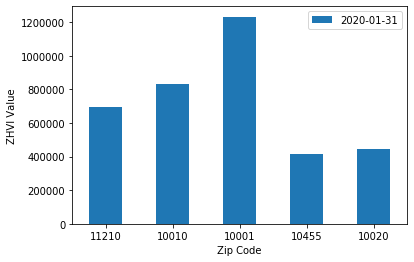

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
df = pd.read_csv('C:/Users/Dominick Velez/Downloads/Valerie/Zillow Data/Zip_Zhvi_AllHomes.csv')

sorted1 = df[df['RegionName'].isin([10455, 10001, 11210, 10020, 10010])]
print(sorted1[['RegionName', 'City','CountyName','2020-01-31']])
sorted1.to_csv(r'C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/4) Top 5 Stations ZHVI.csv', index = True)

ax = sorted1.plot.bar(x='RegionName', y='2020-01-31', rot=0)
ax.set(xlabel="Zip Code", ylabel="ZHVI Value")
ax


dENTRIES
                                                              sum
UNIT STATION        SCP      DATE       TIME     ENTRIES         
R020 47-50 STS ROCK 00-00-00 01/01/2020 03:00:00 740329     219.0
                                        07:00:00 740344      15.0
                                        11:00:00 740359      15.0
                                        15:00:00 740593     234.0
                                        19:00:00 741460     867.0
...                                                           ...
R111 23 ST          02-06-02 12/31/2019 07:00:00 529895       4.0
                                        11:00:00 529926      31.0
                                        15:00:00 530004      78.0
                                        19:00:00 530124     120.0
                                        23:00:00 530181      57.0

[21138 rows x 1 columns]
       UNIT         STATION       SCP        DATE      TIME ENTRIES dENTRIES
2      R020  47-50 STS ROCK  0

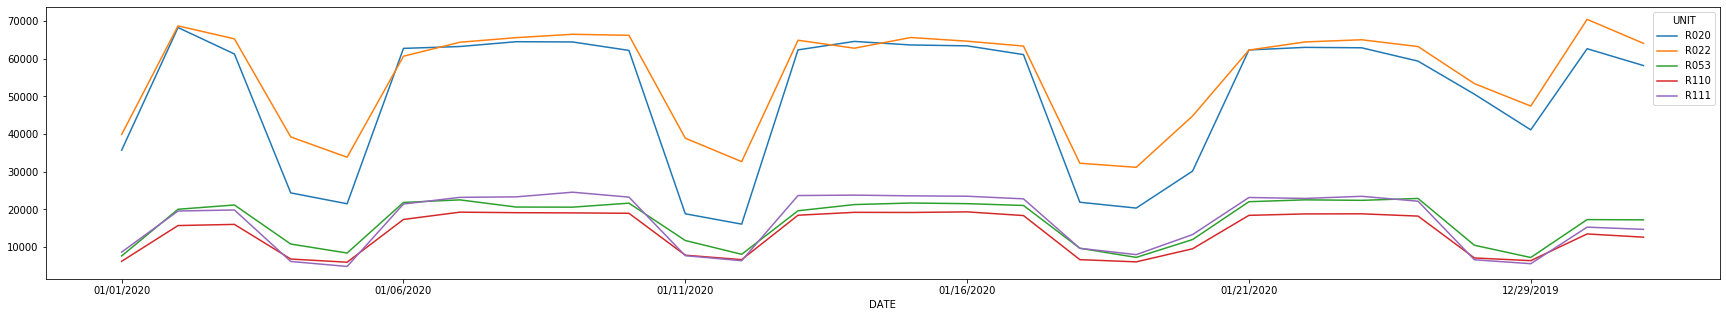

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
de1 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200104.txt',sep=',')
de2 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200111.txt',sep=',')
de3 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200118.txt',sep=',')
de4 = pd.read_table('C:/Users/Dominick Velez/Downloads/Valerie/MTA Data/turnstile_200125.txt',sep=',')
df=pd.concat([de1,de2,de3,de4])


specific_stations = df[df['UNIT'].isin(['R053','R022','R110','R020','R111'])]
specific_stations["dENTRIES"] = specific_stations["ENTRIES"].diff(+1)
a = np.array(specific_stations['dENTRIES'].values.tolist())
specific_stations['dENTRIES'] = np.where(a < 0 , 0, a).tolist()
b = np.array(specific_stations['dENTRIES'].values.tolist())
specific_stations['dENTRIES'] = np.where(b > 10000 , 0, b).tolist()
filtered = specific_stations.groupby(['UNIT','STATION','SCP','DATE','TIME','ENTRIES']).agg({'dENTRIES': ['sum']})
print(filtered)
filtered.to_csv(r'C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/2) Difference Per Time Recording.csv', index = True)

ndf = pd.read_csv('C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/2) Difference Per Time Recording.csv')
change_column_name = ndf.rename(columns={ ndf.columns[0]: "UNIT" ,ndf.columns[1]: "STATION" ,ndf.columns[2]: "SCP" ,ndf.columns[3]: "DATE" ,ndf.columns[4]: "TIME" ,ndf.columns[5]: "ENTRIES" }, inplace = False)
drop_NaN = change_column_name.dropna()
print(drop_NaN)
specific_date = drop_NaN
sum_turnstile_all_day = specific_date.groupby(['UNIT','STATION','DATE'])['dENTRIES'].sum()
sum_turnstile_all_day = drop_NaN.groupby(['UNIT','STATION','DATE'])['dENTRIES'].agg(lambda x: pd.to_numeric(x, errors='coerce').sum())
sum_turnstile_all_day.to_csv(r'C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/3) Top 5 Stations Daily Entries.csv', index = True)
print(sum_turnstile_all_day)

ndf2 = pd.read_csv('C:/Users/Dominick Velez/Downloads/Valerie/Pandas Exports/3) Top 5 Stations Daily Entries.csv')
print(ndf2)

ndf2 = ndf2.pivot(index='DATE', columns='UNIT', values='dENTRIES')
ndf2.plot (figsize=(30,5))

